<a href="https://colab.research.google.com/github/shindechi/Aerofit-Business-Case-Study/blob/main/Aerofit_Casestudy_Prachi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Casestudy Aerofit**

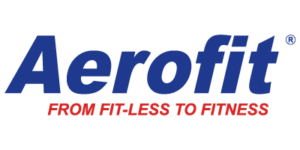

**Note: I have addressed only questions mentioned in the pdf named Netix Data Exploration Business Case solution Approach**

**Some plots might not get completely printed on the pdf hence providing google colab link.**

https://colab.research.google.com/drive/1-Z_1H79sP0viMM6WGjuY2O7K0jpooIRX?usp=sharing

#Business Problem
The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics. The team has collected the data of 180 customers who have purchased the treadmills from the company.

The data includes the following variables:
1. Product: The type of treadmill purchased
2. Age: The age of customer
3. Gender: The Gender of the customer
4. Education: The education level of the customer(in years)
5. Marital Status: The marital status of the customer
6. Usage: The average number of times the customer uses the treadmill every week
7. Fitness: Self-rated fitness level of the customer, on a scale of 1 to 5
8. Income: The annual income of the customer
9. Miles: The average number of miles the customer expects to walk/run on the treadmill every week

#Objectives
1. Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
2. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

#Product Portfolio
• The KP281 is an entry-level treadmill that sells for $1,500.

• The KP481 is for mid-level runners that sell for $1,750.

• The KP781 treadmill is having advanced features that sell for $2,500.

# **1.Checking the structure & characteristics of the dataset**

In [ ]:
# Importing necessary libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Loading the aerofit data

!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
To: /content/aerofit_treadmill.csv?1639992749
100% 7.28k/7.28k [00:00<00:00, 22.8MB/s]


In [ ]:
# Assuming 'data' is your DataFrame

data = pd.read_csv("aerofit_treadmill.csv?1639992749")

#Overview of head and tail combined of the netflix dataframe

data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
# Get a concise summary of the DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


 *Insights*

---

The Aerofit dataset comprises 9 columns, with 3 columns being categorical and 6 columns being numerical. While no columns showing null values.

In [ ]:
#Check the null values

print('\nColumns with missing value:')
print(data.isnull().any())


Columns with missing value:
Product          False
Age              False
Gender           False
Education        False
MaritalStatus    False
Usage            False
Fitness          False
Income           False
Miles            False
dtype: bool


In [ ]:
# Display the first few rows of the DataFrame

data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
# Number of columns

data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:
# Check the shape of the DataFrame

data.shape

(180, 9)

In [ ]:
#Check the dimensions of the DataFrame

data.ndim

2

 **Insights*

---

The Aerofit dataset is 2 dimensional with 180 enteries and 9 descriptions.

In [ ]:
# Summary statistics for numerical columns

data.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


 **Insights*

---

*No missing values exist in the datase.

*The dataset contains 3 unique products namely-KP281,KP481,KP781.

*KP281 is the most frequently occurring product.

*Age ranges from 18 to 50 years, with a mean of approximately 28.79 years.

*75% of individuals are aged 33 or younger.

*Most individuals have 16 years of education or less; specifically, 75% have attained this level.

*Out of 180 data points, 104 individuals are male, and the remaining are female.

*Both the income and miles variables exhibit high standard deviations, indicating the possible presence of outliers.





In [ ]:
# checking the unique values for columns
#overview of values
for i in data.columns:
    print('Unique Values in',i,'column are :-')
    print(data[i].unique())
    print('-'*70)

Unique Values in Product column are :-
['KP281' 'KP481' 'KP781']
----------------------------------------------------------------------
Unique Values in Age column are :-
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
----------------------------------------------------------------------
Unique Values in Gender column are :-
['Male' 'Female']
----------------------------------------------------------------------
Unique Values in Education column are :-
[14 15 12 13 16 18 20 21]
----------------------------------------------------------------------
Unique Values in MaritalStatus column are :-
['Single' 'Partnered']
----------------------------------------------------------------------
Unique Values in Usage column are :-
[3 2 4 5 6 7]
----------------------------------------------------------------------
Unique Values in Fitness column are :-
[4 3 2 1 5]
----------------------------------------------------------------------
Unique Valu

**2.Detect Outliers**

a) Find the outliers for every continuous variable in the dataset



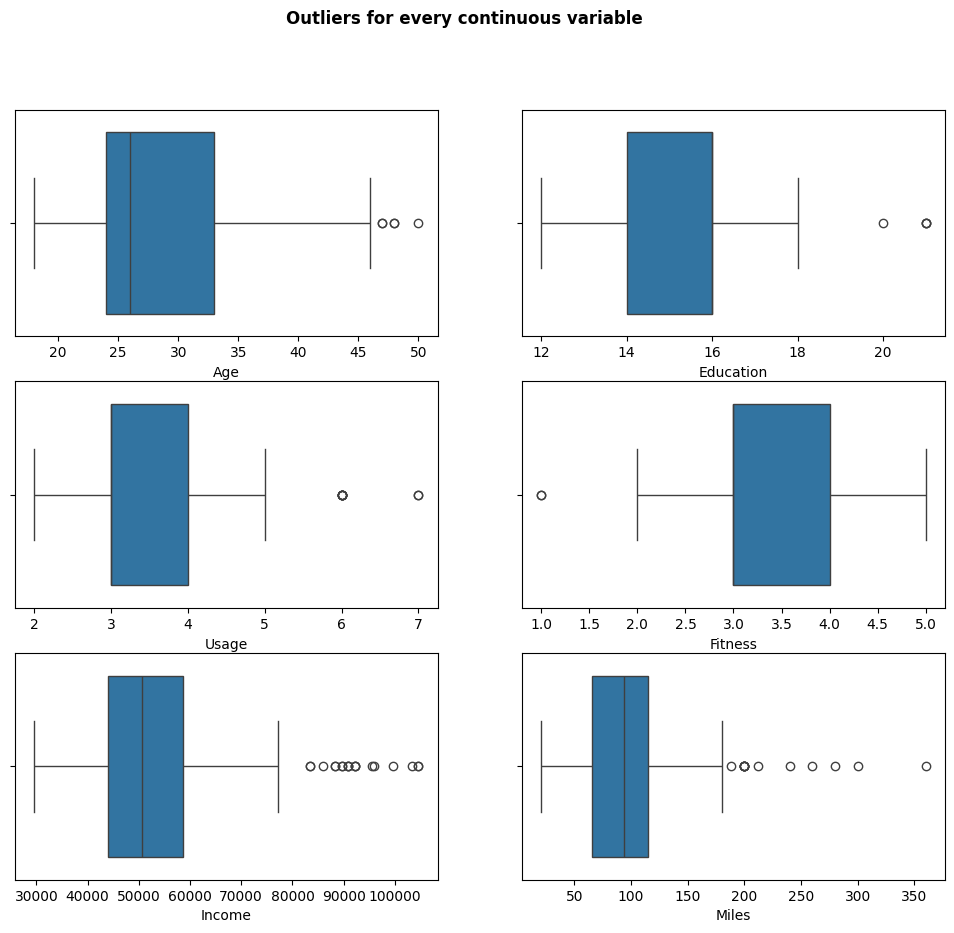

In [ ]:

fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.suptitle("Outliers for every continuous variable", weight='bold')
#fig.subplots_adjust(top=1)

sns.boxplot(data=data, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=data, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=data, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=data, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=data, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=data, x="Miles", orient='h', ax=axis[2,1])
plt.show()

 **Insights*

---
*Age, Education and Usage are having very few outliers

*While Income and Miles are having more outliers.

b) Remove/clip the data between the 5 percentile and 95 percentile

In [ ]:
# Replace 'continuous_cols' with the names of your continuous variables
continuous_cols = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

# Step 3: Calculate the 5th and 95th percentiles for each column
percentiles = data[continuous_cols].quantile([0.05, 0.95])

# Step 4: Clip the data to remove outliers
for col in continuous_cols:
    lower_bound = percentiles.loc[0.05, col]
    upper_bound = percentiles.loc[0.95, col]

    # Clip values outside the 5th and 95th percentiles
    data[col] = np.clip(data[col], lower_bound, upper_bound)

# Now data contains the clipped data where outliers are removed

In [ ]:
continuous_cols
percentiles

,Age,Education,Usage,Fitness,Income,Miles
0.05,20.00,14.0,2.00,2.0,34053.15,47.0
0.95,43.05,18.0,5.05,5.0,90948.25,200.0


c) Observed whether all outliers were clipped

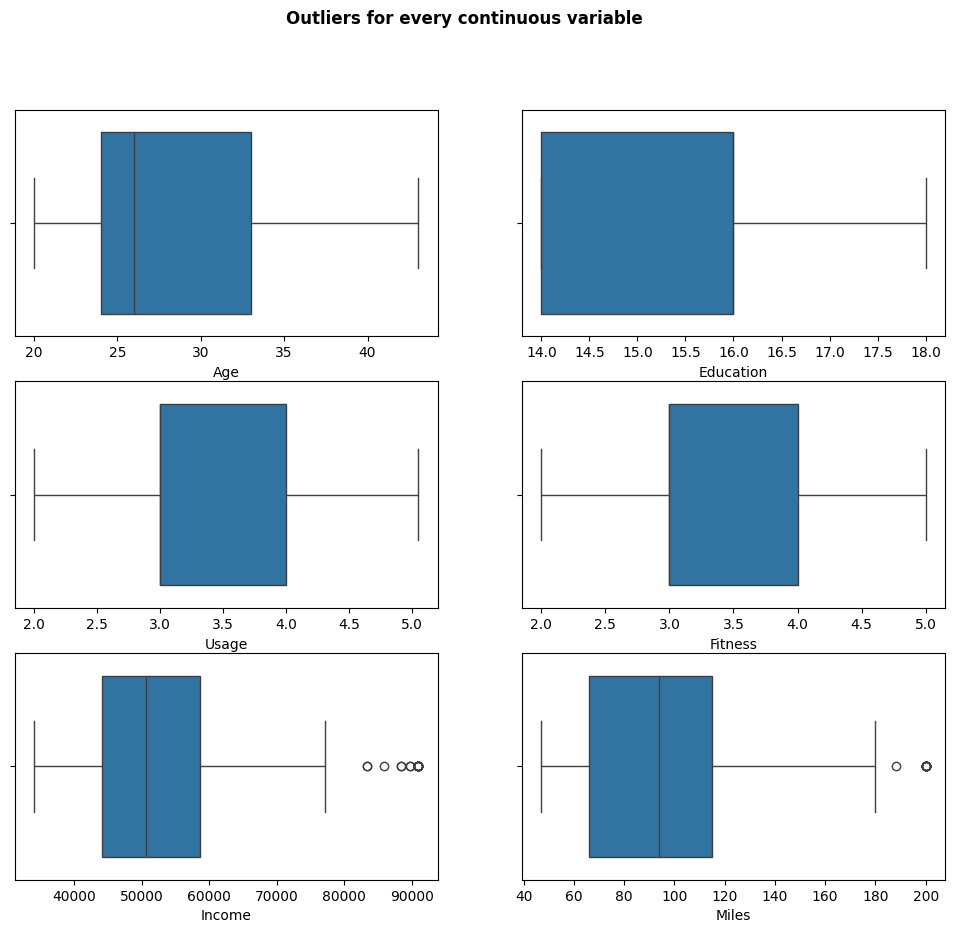

In [ ]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.suptitle("Outliers for every continuous variable", weight='bold')
#fig.subplots_adjust(top=1)

sns.boxplot(data=data, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=data, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=data, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=data, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=data, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=data, x="Miles", orient='h', ax=axis[2,1])
plt.show()

 **Insights*

---
Outliers exceeded 95 and 5 percentile in column Income and Miles

In [ ]:
#Outlier analysis after readjustments
continuous_cols = ['Income', 'Miles']

# Calculate updated percentiles (e.g., [0.11, 0.89]) for clipping
percentiles = data[continuous_cols].quantile([0.11, 0.89])

# Clip the data to remove outliers using updated percentiles
for col in continuous_cols:
    lower_bound = percentiles.loc[0.11, col]
    upper_bound = percentiles.loc[0.89, col]

    # Clip values outside the 1st and 99th percentiles
    data[col] = np.clip(data[col], lower_bound, upper_bound)

# Now data should contain the clipped data where outliers are removed based on adjusted percentiles

d) Outlier analysis after readjustments

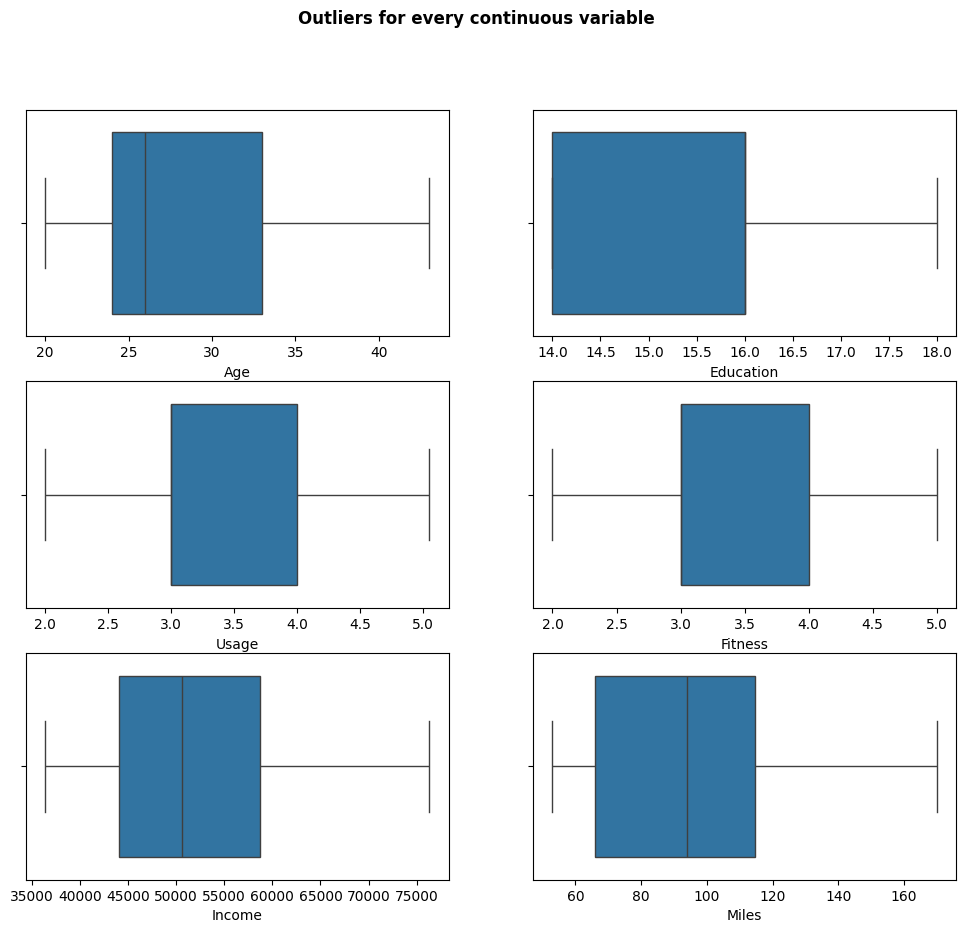

In [ ]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.suptitle("Outliers for every continuous variable", weight='bold')
#fig.subplots_adjust(top=1)

sns.boxplot(data=data, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=data, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=data, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=data, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=data, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=data, x="Miles", orient='h', ax=axis[2,1])
plt.show()

 **Insights*

---
All the outliers are removed from every columns.

e) Understanding the distribution of the data for the quantitative atributes:


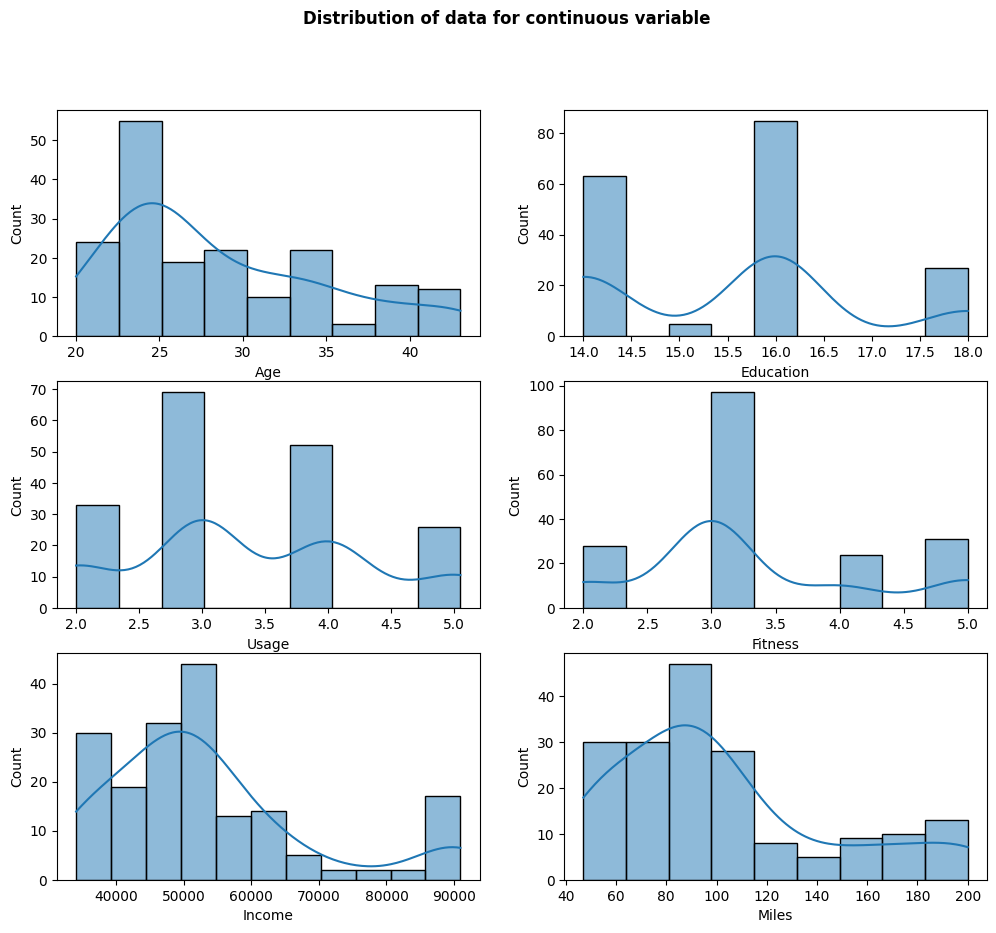

In [ ]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.suptitle("Distribution of data for continuous variable", weight='bold')
#fig.subplots_adjust(top=0.8)

sns.histplot(data=data, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=data, x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=data, x="Usage", kde=True, ax=axis[1,0])
sns.histplot(data=data, x="Fitness", kde=True, ax=axis[1,1])
sns.histplot(data=data, x="Income", kde=True, ax=axis[2,0])
sns.histplot(data=data, x="Miles", kde=True, ax=axis[2,1])
plt.show()

 **Insights*

---
 - Most of the customers (more than 80% of the total) are aged between 20 and 30 years.

 - Less than 10% customers are aged 40 years and above.

 - It can be evidently observed in the above plot that most customers have 16 years of Education, followed by 14 years and 18 years.

- There are about 40% of customers who use treadmills three days a week and about 30% who use them four days a week.

- More than 50% customers rate themselves 3 out of 5 in self rated fitness scale

- Around 30% of the total customers rate themselves 4 or above in the fitness scale.

- Around 70 % of the aerofit customers rate themselves 3 or less than 3 in fitness scale.

- Less than 20 % of aerofit customers have excellent shape.

- Majority of the customers earn in between 35000 and 60000 dollars annually.

- 80 % of the customers annual salary is less than 65000$.

- On the above plot, we can see that most customers expect to walk or run between 40 and 120 miles a week.


**3. Check if features like marital status, Gender, and age have any effect on the product purchased.**

Find if there is any relationship between the categorical variables and the output
variable in the data.


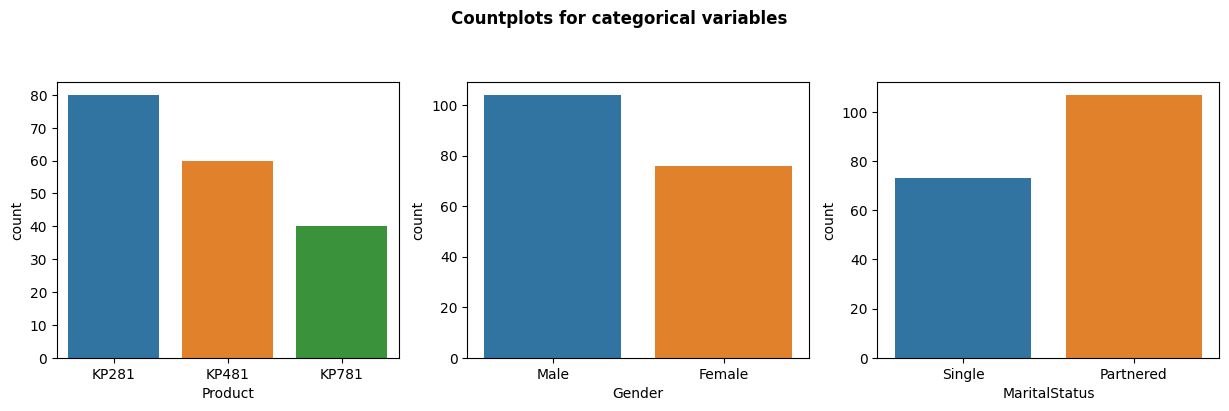

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
fig.suptitle("Countplots for categorical variables", weight='bold')
fig.subplots_adjust(top=0.8)
sns.countplot(data=data, x='Product', ax=axs[0], hue='Product')
sns.countplot(data=data, x='Gender', ax=axs[1], hue='Gender')
sns.countplot(data=data, x='MaritalStatus', ax=axs[2], hue='MaritalStatus')
plt.show()

 **Insights*

---
- KP281 is the most frequent product.
- Thare are more Males in the data than Females.
- More Partnered persons are there in the data.

In [ ]:
#normalized count for each variable is shown below
df1 = data[['Product', 'Gender', 'MaritalStatus']].melt()
df1.groupby(['variable', 'value'])[['value']].count() / len(data)

value
variable      value              
Gender        Female     0.422222
              Male       0.577778
MaritalStatus Partnered  0.594444
              Single     0.405556
Product       KP281      0.444444
              KP481      0.333333
              KP781      0.222222

 **Insights*

---
# Product
- 44.44% of the customers have purchased KP2821 product.
- 33.33% of the customers have purchased KP481 product.
- 22.22% of the customers have purchased KP781 product.
# Gender
- 57.78% of the customers are Male.
- 42.22% of the customers are Female.
# MaritalStatus
- 59.44% of the customers are Partnered.
- 40.56% of the customers are Single.

Find if there is any relationship between the continuous variables and the output variable in the data.


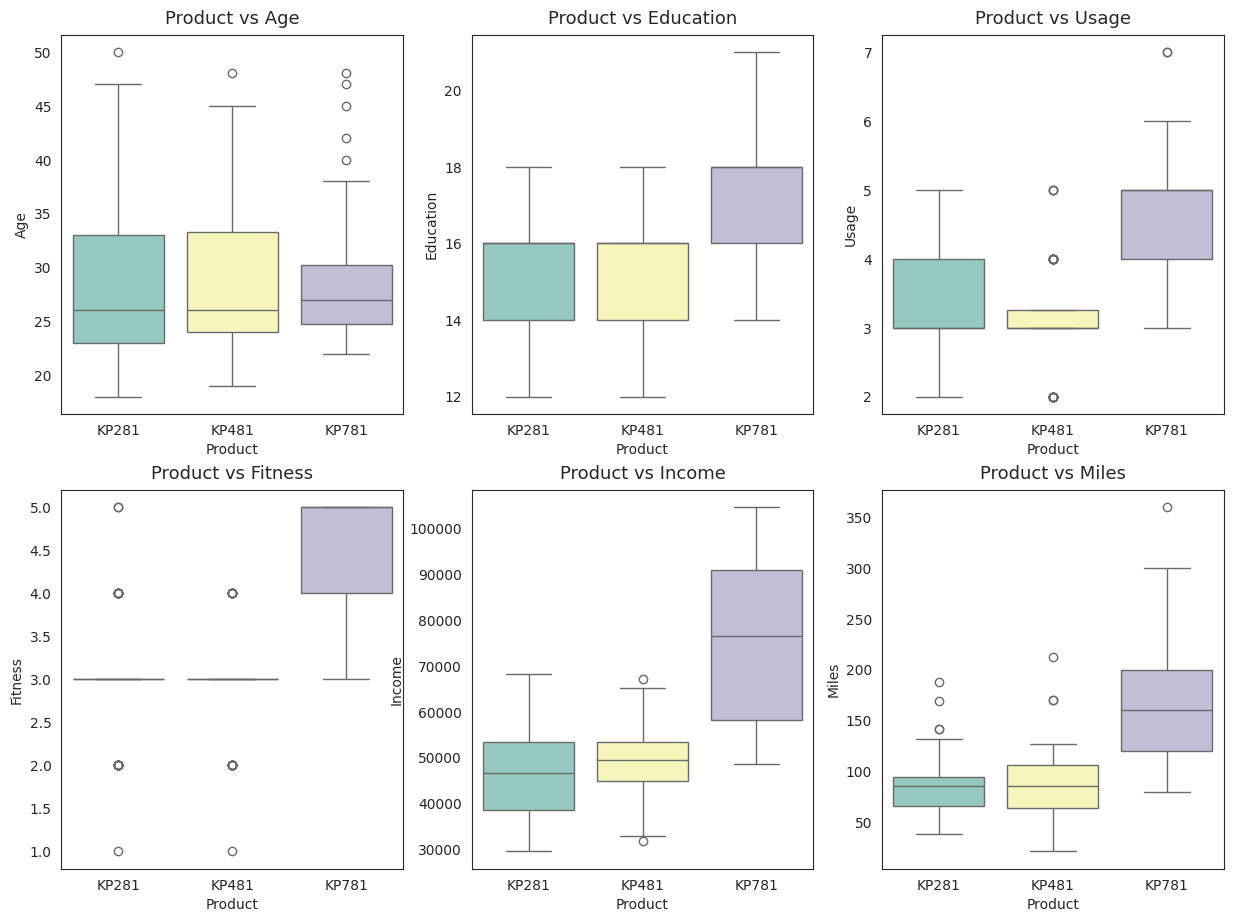

In [ ]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income','Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 6))
#fig.suptitle("Countplots for categorical variables", weight='bold')
fig.subplots_adjust(top=1.5)
count = 0
for i in range(2):
  for j in range(3):
      sns.boxplot(data=data, x='Product', y=attrs[count], ax=axs[i,j], palette='Set3', hue='Product')
      axs[i,j].set_title(f"Product vs {attrs[count]}", pad=8, fontsize=13)
      count += 1


 **Insights*

---
### 1.Product vs Age:

- Customers purchasing products KP281 & KP481 are having same Age median value.
- Customers whose age lies between 25-30, are more likely to buy KP781 product

### 2.Product vs Education:

- Customers whose Education is greater than 16, have more chances to purchase the KP781 product.
- While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481.

### 3.Product vs Usage:

- Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product.
- While the other customers are likely to purchasing KP281 or KP481.

### 4.Product vs Fitness:
- The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase the KP781 product.

### 5.Product vs Income:
- Higher the Income of the customer (Income >= 60000), higher the chances of the customer to purchase the KP781 product.

### 6.Product vs Miles:
- If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy KP781 product.

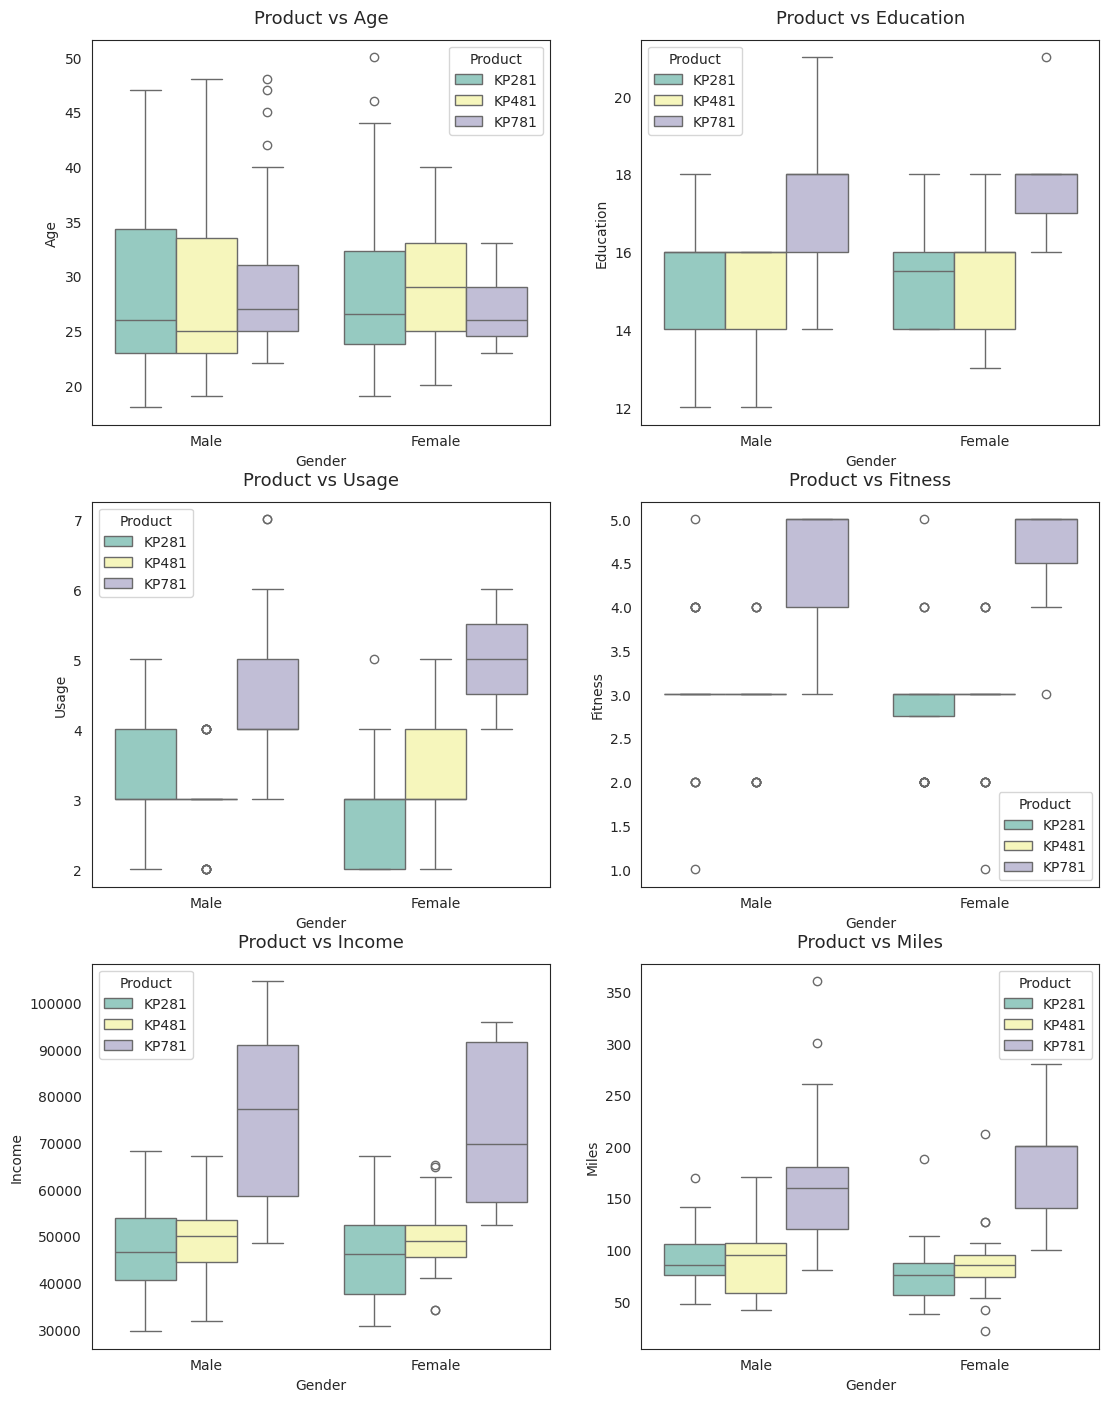

In [ ]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(13, 11))
fig.subplots_adjust(top=1.3)
count = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=data, x='Gender', y=attrs[count], hue='Product', ax=axs[i,j], palette='Set3')
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)
        count += 1

 **Insights*

---
- Very fewer Females prefer KP781.
-  KP281 is the most preferred product by both genders, and also both married and single customers, which align with previous observations that it is the most sold product
- Approximately there is a 60-40 split between male and female customers.
- Majority of the customers are married. We can see and assume that Marital Status also has a 60-40 split.
-Females planning to use treadmill 3-4 times a week, are more likely to buy KP481 product

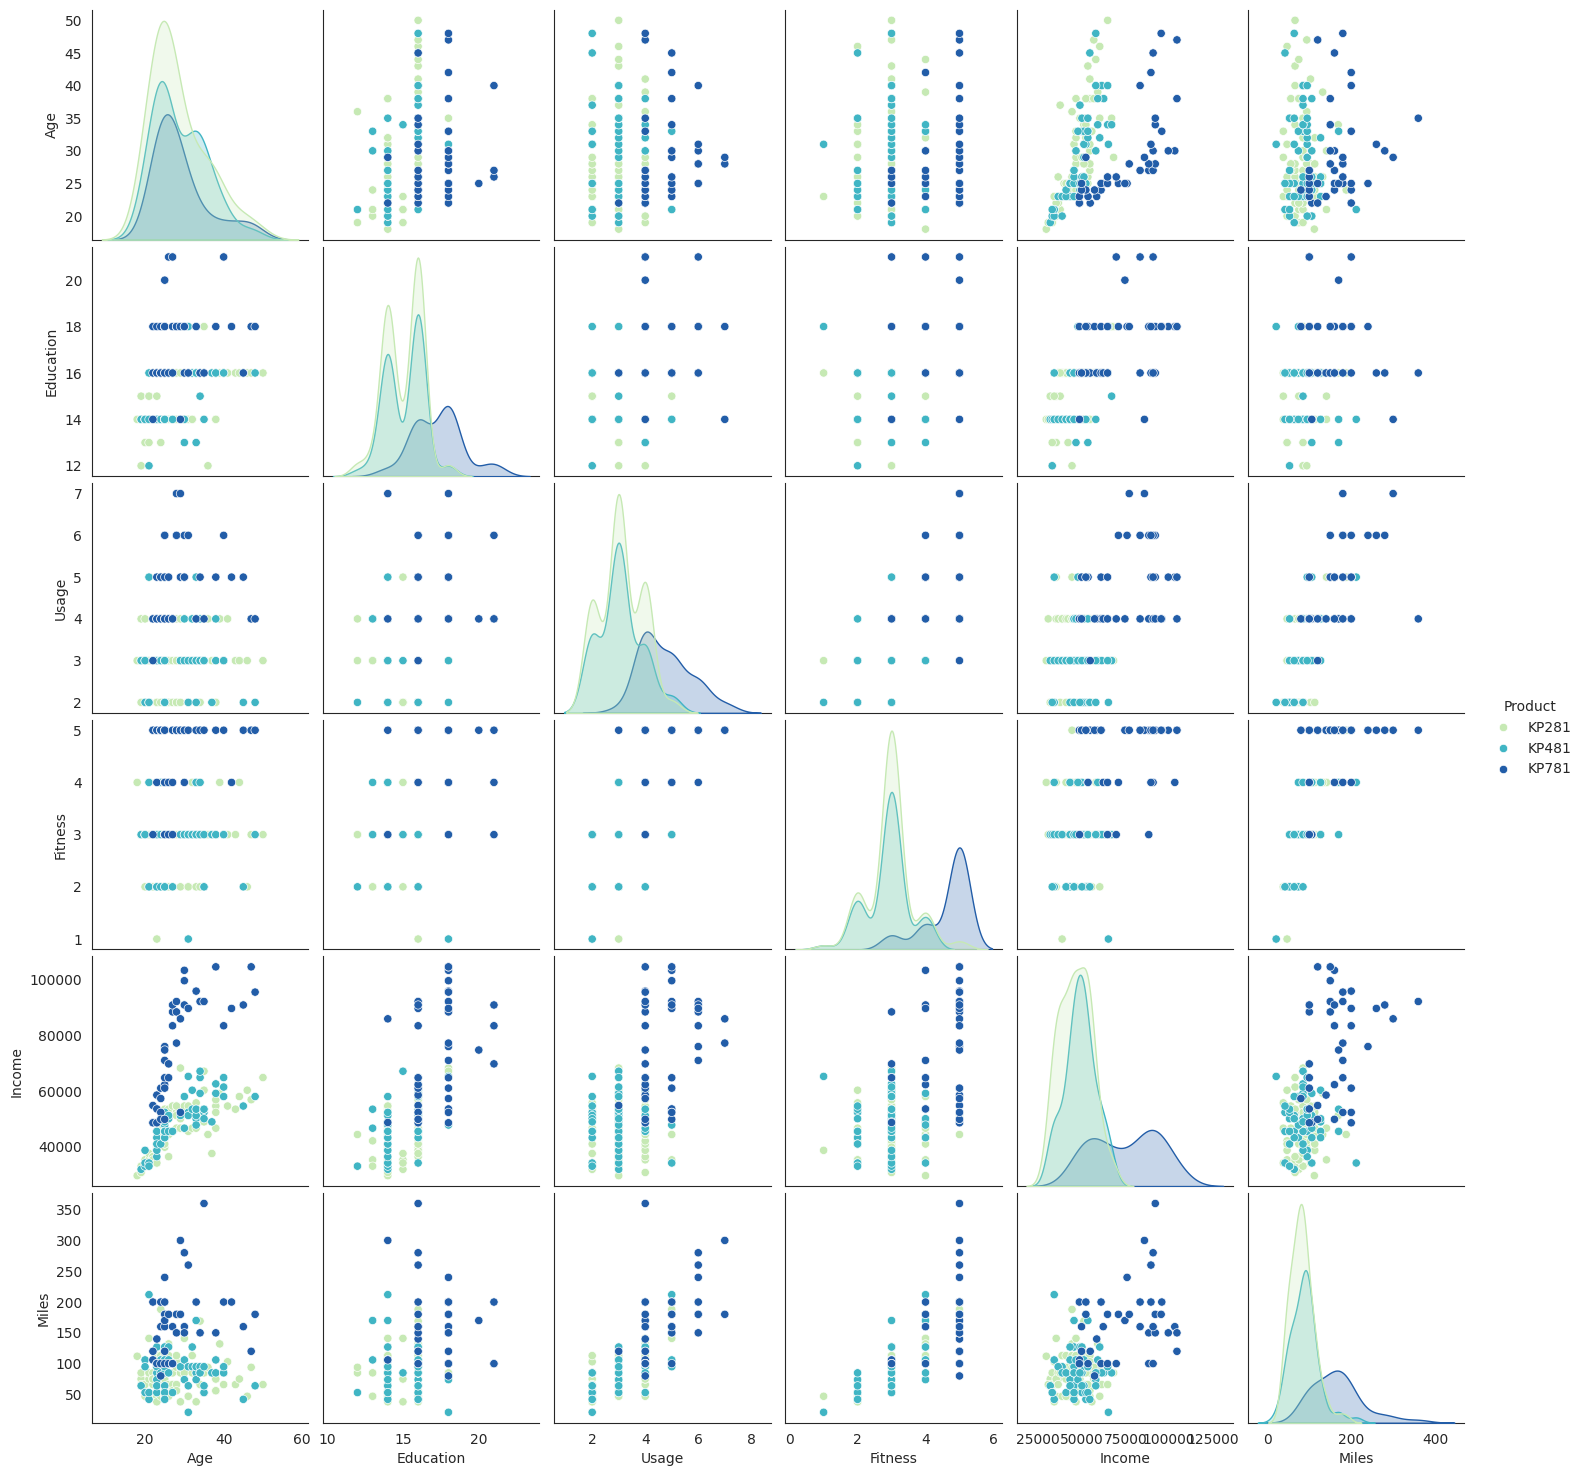

In [ ]:
import copy
df_copy = copy.deepcopy(data)
sns.pairplot(df_copy, hue ='Product', palette= 'YlGnBu')
plt.show()

### **4. Representing the Probability**

a) Find the marginal probability (what percent of customers have purchased
KP281, KP481, or KP781)

In [ ]:
product_marginal_Probability = data['Product'].value_counts(normalize=True).round(2)
product_marginal_Probability

Product
KP281    0.44
KP481    0.33
KP781    0.22
Name: proportion, dtype: float64

Find the probability that the customer buys a product based on each column.

In [ ]:
#Marginal Probability of Gender
gender_marginal_Probability = data['Gender'].value_counts(normalize=True).round(2)
gender_marginal_Probability

Gender
Male      0.58
Female    0.42
Name: proportion, dtype: float64

In [ ]:
#Marginal Probability of Fitness
fitness_marginal_Probability = data['Fitness'].value_counts(normalize=True).round(2)
fitness_marginal_Probability

Fitness
3    0.54
5    0.17
2    0.16
4    0.13
Name: proportion, dtype: float64

In [ ]:
#Marginal Probability of Marital Status
mStatus_marginal_Probability = data['MaritalStatus'].value_counts(normalize=True).round(2)
mStatus_marginal_Probability

MaritalStatus
Partnered    0.59
Single       0.41
Name: proportion, dtype: float64

b) Find the conditional probability that an event occurs given that another event has occurred.

In [ ]:
#Probability of the customer's gender, given the product he/she bought a specific Product
(pd.crosstab(data["Gender"],data['Product'])/pd.crosstab(data["Gender"],data['Product']).sum()).round(2)

Product,KP281,KP481,KP781
Gender,,,
Female,0.5,0.48,0.18
Male,0.5,0.52,0.82


In [ ]:
#Probability of buying a product, given the Gender of the customer
(pd.crosstab(data["Product"],data['Gender'])/pd.crosstab(data["Product"],data['Gender']).sum()).round(2)

Gender,Female,Male
Product,,
KP281,0.53,0.38
KP481,0.38,0.30
KP781,0.09,0.32


In [ ]:
#Probability of buying a product, given the Marital Status of the person
(pd.crosstab(data["Product"],data["MaritalStatus"])/pd.crosstab(data["Product"],data["MaritalStatus"]).sum()).round(2)

MaritalStatus,Partnered,Single
Product,,
KP281,0.45,0.44
KP481,0.34,0.33
KP781,0.21,0.23


In [ ]:
#Probability of buying a product, given the Fitness of the person
(pd.crosstab(data["Product"],data["Fitness"])/pd.crosstab(data["Product"],data["Fitness"]).sum()).round(2)

Fitness,2,3,4,5
Product,,,,
KP281,0.54,0.56,0.38,0.06
KP481,0.46,0.40,0.33,0.00
KP781,0.00,0.04,0.29,0.94


In [ ]:
#Probability of buying a product, given the age of a customer
# First we create a Deep-copy to create Bins for different age groups
temp_data = data.copy(deep=True)
bin_labels = ['17-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-51']
temp_data["Age"] = pd.cut(temp_data['Age'], bins=[17,20,25,30,35,40,45,51], labels= bin_labels)
(pd.crosstab(temp_data['Product'], temp_data["Age"])/pd.crosstab(temp_data['Product'], temp_data["Age"]).sum()).round(2)

Age,17-20,21-25,26-30,31-35,36-40,41-45
Product,,,,,,
KP281,0.6,0.41,0.51,0.34,0.50,0.50
KP481,0.4,0.35,0.17,0.53,0.38,0.17
KP781,0.0,0.25,0.32,0.12,0.12,0.33


In [ ]:
#Probability of buying a product, given the income of a customer
temp_data = data.copy(deep=True)
bin_labels = ['0k-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k',"70k-80k","80k-90k","90k-100k","100k-110k"]
temp_data["Income"] = pd.cut(temp_data['Income'], bins=[0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000], labels= bin_labels)
(pd.crosstab(temp_data['Product'], temp_data["Income"])/pd.crosstab(temp_data['Product'], temp_data["Income"]).sum()).round(2)

Income,30k-40k,40k-50k,50k-60k,60k-70k,70k-80k
Product,,,,,
KP281,0.72,0.49,0.47,0.32,0.0
KP481,0.28,0.41,0.42,0.37,0.0
KP781,0.00,0.10,0.11,0.32,1.0


**5. Check the correlation among different factors**

In [ ]:
#Change datatype to int
data['Usage'] = data['Usage'].astype('int')
data['Fitness'] = data['Fitness'].astype('int')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        180 non-null    object 
 1   Age            180 non-null    float64
 2   Gender         180 non-null    object 
 3   Education      180 non-null    int64  
 4   MaritalStatus  180 non-null    object 
 5   Usage          180 non-null    int64  
 6   Fitness        180 non-null    int64  
 7   Income         180 non-null    float64
 8   Miles          180 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 12.8+ KB


In [ ]:
#drop columns with data as object
dat = data.drop(columns=['Product', 'MaritalStatus', 'Gender'])
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        180 non-null    float64
 1   Education  180 non-null    int64  
 2   Usage      180 non-null    int64  
 3   Fitness    180 non-null    int64  
 4   Income     180 non-null    float64
 5   Miles      180 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 8.6 KB


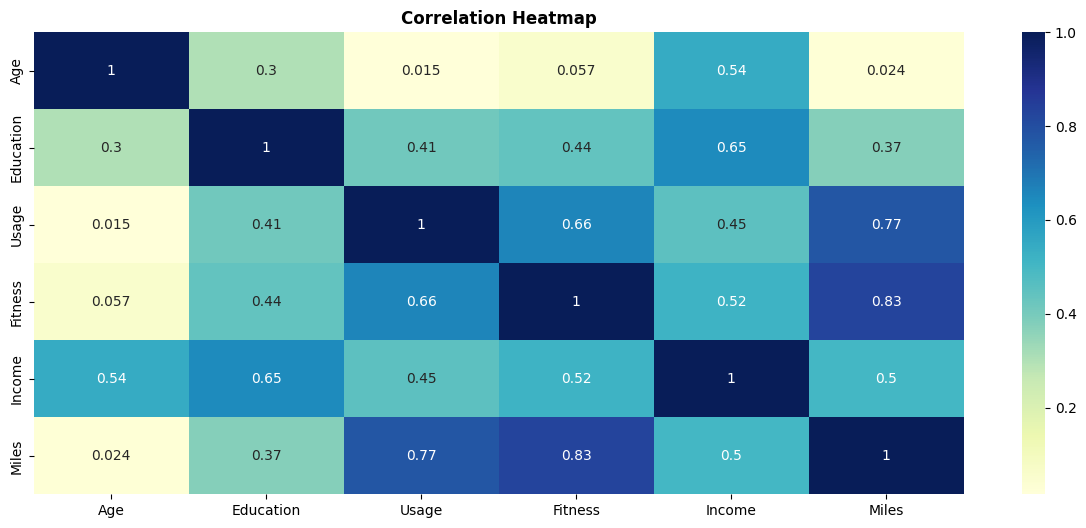

In [ ]:
#correlation between the enteries
corr_m = dat.corr()
plt.figure(figsize=(15,6))
fig.subplots_adjust(top=1)
sns.heatmap(corr_m,annot = True, cmap="YlGnBu")
plt.title('Correlation Heatmap', weight='bold')
plt.show()

 **Insights*

---
- From the pair plot we can see Age and Income are positively correlated and heatmap also suggests a strong correlation between them

- Eductaion and Income are highly correlated as its obvious. Eductation also has significatnt correlation between Fitness rating and Usage of the treadmill.

- Usage is highly correlated with Fitness and Miles as more the usage more the fitness and mileage.

# **6.Customer proﬁling and recommendation**

Make customer proﬁlings for each and every product.


In [ ]:
#KP281
data[data['Product'] == 'KP281'].describe().round(2)

,Age,Education,Usage,Fitness,Income,Miles
count,80.00,80.00,80.00,80.00,80.00,80.00
mean,28.43,15.12,3.09,2.98,46887.04,83.80
std,6.68,1.07,0.78,0.64,8408.40,26.49
min,20.00,14.00,2.00,2.00,36384.00,53.00
25%,23.00,14.00,3.00,3.00,38658.00,66.00
50%,26.00,16.00,3.00,3.00,46617.00,85.00
75%,33.00,16.00,4.00,3.00,53439.00,94.00
max,43.05,18.00,5.00,5.00,68220.00,170.00


 **Insights*

---
- The mean age of the participants is approximately 28.43 years, with a standard deviation of around 6.68 years.

- On average, participants rated their product usage at around 3.09 on a scale of 1 to 5, with a standard deviation of approximately 0.78

- Similarly, the average fitness level reported is approximately 2.96, with a standard deviation of about 0.66.

- The average income among participants is approximately dollar 46,418 with a minimum of dollar 29,562 and a maximum of $68,220.

- The mean number of miles participants expect to run/walk is approximately 82.79, with astandard deviation of around 28.87

In [ ]:
#KP781
data[data['Product'] == 'KP781'].describe().round(2)

,Age,Education,Usage,Fitness,Income,Miles
count,40.00,40.00,40.00,40.00,40.00,40.00
mean,28.83,17.05,4.50,4.62,67644.38,146.15
std,6.30,1.20,0.55,0.67,10778.11,29.63
min,22.00,14.00,3.00,3.00,48556.00,80.00
25%,24.75,16.00,4.00,4.00,58204.75,120.00
50%,27.00,18.00,5.00,5.00,76138.98,160.00
75%,30.25,18.00,5.00,5.00,76331.95,170.00
max,43.05,18.00,5.00,5.00,76331.95,170.00


 **Insights*

---
- The average age of customers for this specific product is approximately 29.1 years, with aminimum age of 22 years and a maximum age of 48 years.
- On average, customers have an education level of around 17.33 years.
- The average product usage rating is approximately 4.78, with a minimum rating of 3 and a maximum rating of 7.
- The average fitness rating of customers is around 4.63, with a minimum rating of 3 and a maximum rating of 5.
- The majority of customers rated their fitness level as 5, as indicated by the median (50th percentile).
- The average income of customers is approximately $75,441.58.7. Customers, on average, run approximately 166.9 miles

In [ ]:
#KP481
data[data['Product'] == 'KP481'].describe().round(2)

,Age,Education,Usage,Fitness,Income,Miles
count,60.00,60.00,60.00,60.00,60.00,60.00
mean,28.80,15.18,3.07,2.92,49276.85,88.50
std,6.33,1.11,0.80,0.59,8125.66,29.05
min,20.00,14.00,2.00,2.00,36384.00,53.00
25%,24.00,14.00,3.00,3.00,44911.50,64.00
50%,26.00,16.00,3.00,3.00,49459.50,85.00
75%,33.25,16.00,3.25,3.00,53439.00,106.00
max,43.05,18.00,5.00,4.00,67083.00,170.00


 **Insights*

---
- The average age of customers for this specific product is approximately 28.9 years, with aminimum age of 19 years and a maximum age of 48 years.
- On average, customers have an education level of around 15.12 years.
- The average product usage rating is approximately 3.07, with a minimum rating of 2 and a maximum rating of 5.
- The average fitness rating of customers is around 2.9, with a minimum rating of 1 and a maximum rating of 4.The majority of customers rated their fitness level as 3, as indicatedby the median (50th percentile).
- The average income of customers is approximately $48,973.65.6. Customers, on average, run approximately 87.93 miles.

#Conclusion

- The KP281 is the most sold product with 80 units sold, followed by KP481 with 60 units sold, and KP781 with 40 units sold.

- **Relationship with Age:** No major relationship with Age, but customers purchasing KP781mostly earn more than other people of the same age group.

- **Relationship with Income:–** product KP781 is preferred by high-income earning individuals– since highly-educated customer generally earns more, they prefer product KP781 because they exercise more; their fitness levels are generally on high scale, the number of target miles they set are also higher

- **Relationship with Usage:–** product KP781 is used more compared to others products KP281 and KP481– this product is also preferred by highly-educated customers; this means highly-educated customers tend to exercise more

- **Relationship with Education:** The line-plot shows the gradual increase in fitness levels with the increase in education. Highly educated customers prefer product KP781; they could be more aware of the product's typical features and its usage.

- **Relationship with Fitness:–** product KP781 is preferred by customers with high fitness levels– customers with high fitness levels tend to exercise more and set higher target miles

# **Recommendations**

- The company should focus on marketing KP781 to high-income earning individuals, and highly-educated customers, as they are the major customers for this product.

- The company should also focus on marketing KP781 to customers with high fitness levels, since the product is preferred by customers with high fitness levels.

- A better, high-end, premium product for highly-educated, high income and active customers to increase revenue.

- Since KP281 and KP481 also brings in significant revenue and is preferred by young & learnings individuals, added features and specialized discounts could help boost sales.

- Campaigns to promote KP781 product for females specially.    

- Gender Disparity Strategy for KP784: Implement targeted promotions and trials aimed at female customers to boost sales, as only 18% of total sales are currently attributed to them.

- Affordable Pricing and Payment Plans for KP281 and KP481: Offer the KP281 and KP481 Treadmill at competitive prices and provide flexible payment options to cater to customers with diverse budgets.

- User-Friendly App Integration: Develop a treadmill-synced app that tracks users' running mileage, offers real-time feedback, and provides personalized workout recommendations based on their fitness goals, enhancing user engagement and experience.









# **Overall Insights**

- Number of customers who bought products KP281, KP481 and KP781 are in ratio 4 : 3 : 2. That means for every 9 customers, 4 customers bought KP281, 3 bought KP481 and 2 bought KP781.
- There are more male customers than females. Around 60% of the total customers are males.
- There are more customers who are partnered than single. Almost 60% of customers are partnered.
- Age of the customers varies between 18 and 50 years.
- More than 80% of the total customers are aged between 20 and 30 years.
- Annual income of the customers varies in the range of 29562 dollars to 104581 dollars.
- 80 % of the customers annual salary is less than 65000 dollars.
- Expected usage of treadmills lies in the range of 2 to 7 times in a week.
- Expected number of miles that the customer walks or runs vary between 21 miles to 360 miles per week.
- More than 50% customers rate themselves 3 out of 5 in self rated fitness scale
- Around 70 % of the aerofit customers rate themselves 3 or less in fitness scale.
- There are about 40% of customers who use treadmills three days a week and about 30% who use them four days a week.